# Breast Cancer Prediction

## Load dependencies

In [124]:
from configparser import ConfigParser

import numpy as np
import pandas as pd
import shap
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, r2_score, mean_squared_error, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder


In [2]:
# to use the seaborn style in the matplotlib plots
plt.style.use("seaborn")

## Load data

In [8]:
parser = ConfigParser()
_ = parser.read("notebook.cfg")

path = parser.get("paths", "path_repository")

In [9]:
data_path = path + "Data/data-breast-cancer.csv"

In [10]:
df_raw = pd.read_csv(data_path)
data = df_raw.copy()

## Data understanding

Load the data and have a look at the basic properties.

In [11]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [12]:
# Printing the dimensions of data
data.shape

(569, 33)

In [13]:
# Viewing the column heading
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [14]:
# Inspecting the target variable
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [15]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [16]:
# Identifying the unique number of values in the dataset
data.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [17]:
# Checking if any NULL values are present in the dataset
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [18]:
# See rows with missing values
data[data.isnull().any(axis=1)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [19]:
# Viewing the data statistics
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### Data Visualization

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


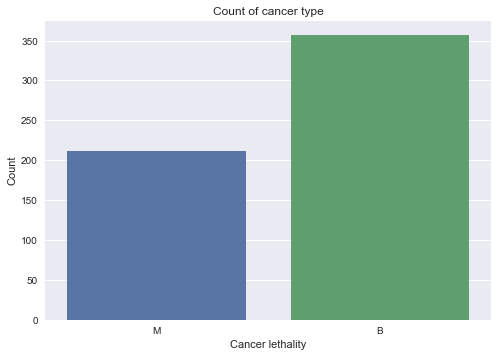

In [20]:
# Analyzing the target variable

plt.title('Count of cancer type')
sns.countplot(data['diagnosis'])
plt.xlabel('Cancer lethality')
plt.ylabel('Count')
plt.show()

In [33]:
# Plotting relation function

def relation(x, y, df):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.boxplot(x=x, y=y, data=df)
    plt.subplot(1,2,2)
    sns.violinplot(x=x, y=y, data=df)
    
    return plt

Boxplot shows us the minimum, first quartile (Q1), median, third quartile (Q3), and maximum. It is useful for detecting the outliers.

Violin plot shows us the kernel density estimate on each side.

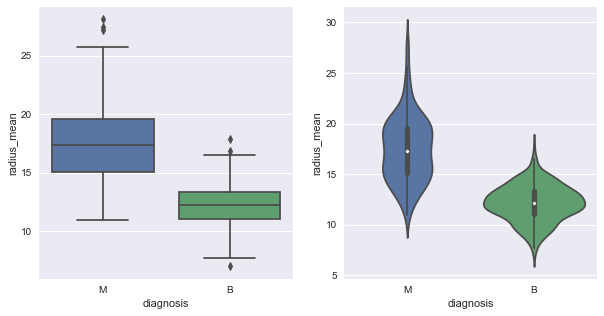

In [38]:
# Plotting correlations between diagnosis and radius

plt = relation("diagnosis", "radius_mean", data)

plt.savefig("images/radius_relation_example.jpg", bbox_inches="tight")
plt.show()

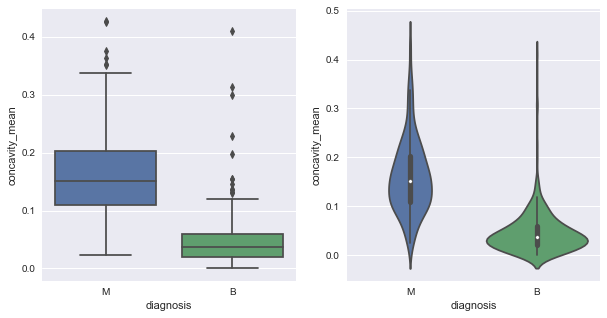

In [26]:
# Plotting correlation between diagnosis and concativity

plt = relation("diagnosis", "concavity_mean", data)

plt.show()

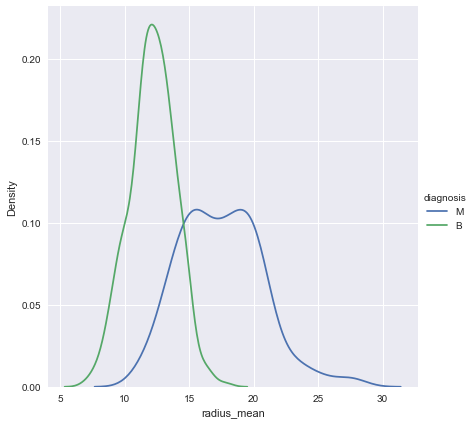

In [27]:
# Distribution density plot KDE (kernel density estimate)
sns.FacetGrid(data, hue="diagnosis", height=6).map(sns.kdeplot, "radius_mean").add_legend()
plt.show()

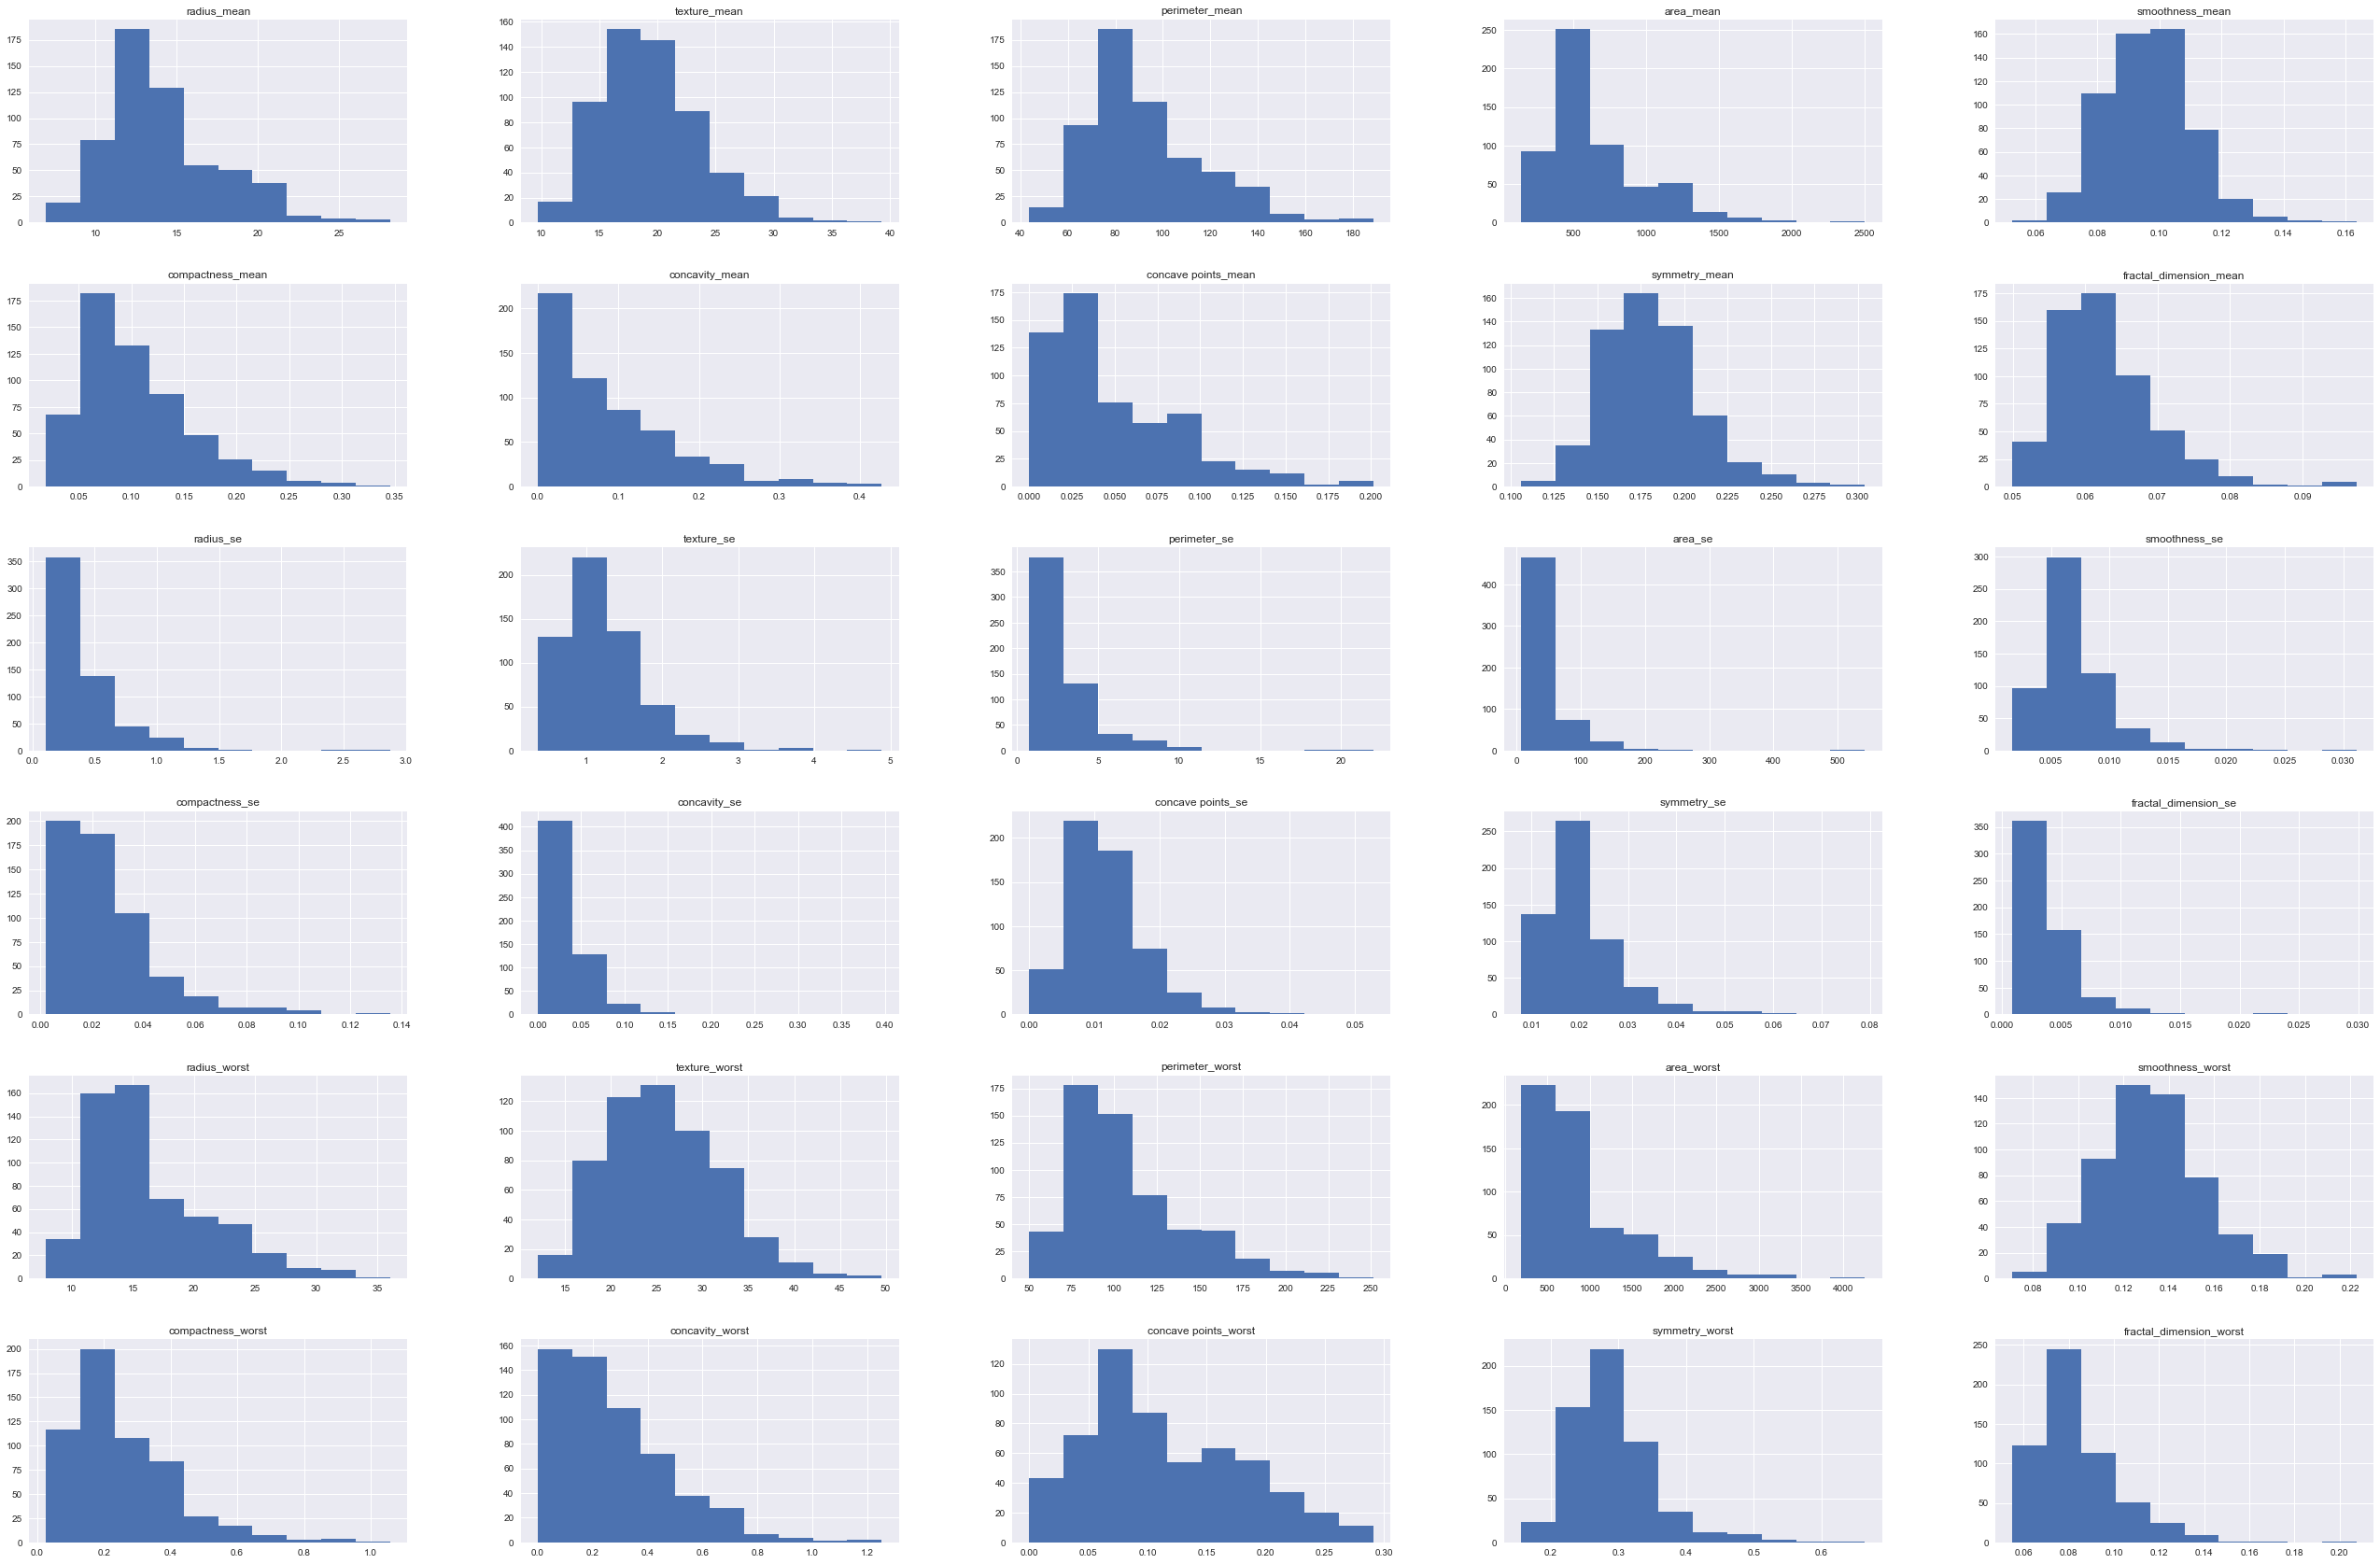

In [45]:
# This creats histograms for all numerical features
data.hist(figsize=(45, 30))
None

## Data preparation and preprocessing

Dropping the Unnamed: 32 and the id column since these do not provide any useful information for our models.

In [39]:
data.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

Once the data is cleaned, we split the data into training set and test set to prepare it for our machine learning model in a suitable proportion.

In [63]:
# Spliting target variable and independent variables
X = data.drop(['diagnosis'], axis = 1)
y = data["diagnosis"].replace(["B", "M"], [0, 1])

In [64]:
# Splitting the data into training set and testset

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 50)
print("Size of training set:", X_train.shape)
print("Size of test set:", X_test.shape)

Size of training set: (398, 30)
Size of test set: (171, 30)


### Split numerical and categorical features

For data preprocessing we have to separate numerical and categorical features. Different preprocessing steps are required for both type of features.

In [69]:
categorical_features = X.iloc[:, list(np.where(X.dtypes == "object")[0])].columns
numerical_features = X.iloc[:, list(np.where(X.dtypes != "object")[0])].columns
categorical_features, numerical_features

(Index([], dtype='object'),
 Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
        'smoothness_mean', 'compactness_mean', 'concavity_mean',
        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
        'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
        'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
        'fractal_dimension_se', 'radius_worst', 'texture_worst',
        'perimeter_worst', 'area_worst', 'smoothness_worst',
        'compactness_worst', 'concavity_worst', 'concave points_worst',
        'symmetry_worst', 'fractal_dimension_worst'],
       dtype='object'))

We don't have categorical values

### Scaling and encoding using a scikit-learn pipeline

Here we show how to apply different preprocessing and feature extraction pipelines for the case of dataset that contain heterogeneous data types, since we may want to scale the numeric features and one-hot encode the categorical ones.

Finally, the preprocessing pipeline is integrated in a full prediction pipeline using sklearn.pipeline.Pipeline, together with the specific ml model.

In [70]:
# The numeric data is standard-scaled
preprocessor = ColumnTransformer(transformers=[("scaler", StandardScaler(), numerical_features)])

## Superviced ML Algorithms

I'm going to start doing cross validaion in the different models I want to train and then select one to work with Hyperparameter tuning and feature interpretation

### Logistic Regression

In [71]:
# Create a Logistic regression classifier
logreg = LogisticRegression(random_state=42)

#  implement pipeline
pipeline_logreg = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", logreg)]
)

In [72]:
type(X_train)

pandas.core.frame.DataFrame

In [73]:
score_lr = cross_val_score(pipeline_logreg, X_train, y_train, cv=4, scoring="f1")
score_lr

array([0.96      , 0.92957746, 0.98701299, 0.97368421])

**Hyperparameter Optimization**

Steps to tune the parameters:
1. Prioritize those parameters which have the most effect on our model. (Example: n-neighbors bor KNN, n-estimators for random forest etc.)
2. Set various values to these parameters and store them in a dictionary as shown below.
3. Create an object of the GridSearchCV class and assign the parameters to it.
4. Fit the training set in the object.
5. We will get the best parameters from the best_estimator_ property of the object.
6. Use this object to fit training set to your classifier.

In [90]:
# Hyperparameter Optimization
parameters = {'C' : [1, 10, 100, 1000],
              'solver': ['liblinear', 'lbfgs'],
              'max_iter': [10000]
             }

# Run the grid search
grid_obj = GridSearchCV(logreg, parameters, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
logreg = grid_obj.best_estimator_

In [81]:
logreg

LogisticRegression(C=100, max_iter=10000, random_state=42)

In [82]:
#  implement pipeline
pipeline_logreg_hyperp = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", logreg)]
)
score_lr_hyperp = cross_val_score(pipeline_logreg_hyperp, X_train, y_train, cv=4, scoring="f1")
score_lr_hyperp

array([0.96103896, 0.92957746, 0.97368421, 0.96103896])

In [87]:
# Save the results to compare the models
scores = []

score = np.mean(score_lr_hyperp)

scores.append(score)

In [183]:
def cross_val_confusion_matrix(model, X, y, cv):
    
    # to use the seaborn style in the matplotlib plots
    plt.style.use('default')
    
    y_pred = cross_val_predict(model, X, y, cv=cv)

    conf_mat = confusion_matrix(y, y_pred)

    class_labels = pipeline_logreg_hyperp.classes_

    print(classification_report(y, y_pred))
#     print(pd.DataFrame(conf_mat, columns=class_labels, index=class_labels))

    cm_disp = ConfusionMatrixDisplay(conf_mat, display_labels=class_labels)
    cm_disp = cm_disp.plot(cmap=plt.cm.Blues,values_format='g')
    plt.show()

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       245
           1       0.95      0.97      0.96       153

    accuracy                           0.97       398
   macro avg       0.96      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398



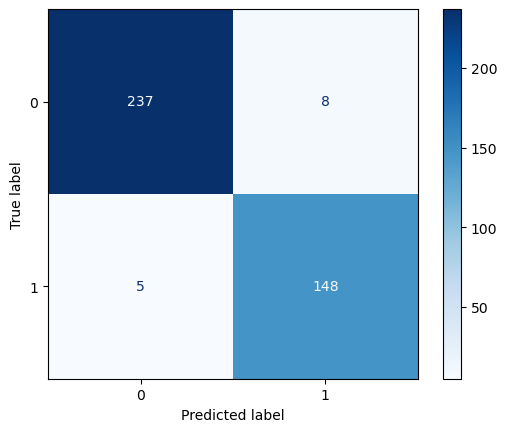

In [184]:
cross_val_confusion_matrix(pipeline_logreg_hyperp, X_train, y_train, 3)

### Decision Tree

In [93]:
# Create a Decision tree classifier model
decisiontree = DecisionTreeClassifier(random_state=42)

#  implement pipeline
pipeline_decisiontree = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", decisiontree)]
)

In [94]:
score_decisiontree = cross_val_score(pipeline_decisiontree, X_train, y_train, cv=4, scoring="f1")
score_decisiontree

array([0.91566265, 0.87323944, 0.92307692, 0.94871795])

In [95]:
# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt', None, 0.8], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

# Run the grid search
grid_obj = GridSearchCV(decisiontree, parameters, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
decisiontree = grid_obj.best_estimator_

In [96]:
decisiontree

DecisionTreeClassifier(max_depth=5, max_features=0.8, min_samples_split=50,
                       random_state=42)

In [97]:
#  implement pipeline
pipeline_decisiontree_hyperp = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", decisiontree)]
)
score_decisiontree_hyperp = cross_val_score(pipeline_decisiontree_hyperp, X_train, y_train, cv=4, scoring="f1")
score_decisiontree_hyperp

array([0.9       , 0.90909091, 0.93670886, 0.95890411])

In [99]:
score = np.mean(score_decisiontree_hyperp)

scores.append(score)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       245
           1       0.90      0.92      0.91       153

    accuracy                           0.93       398
   macro avg       0.92      0.93      0.93       398
weighted avg       0.93      0.93      0.93       398



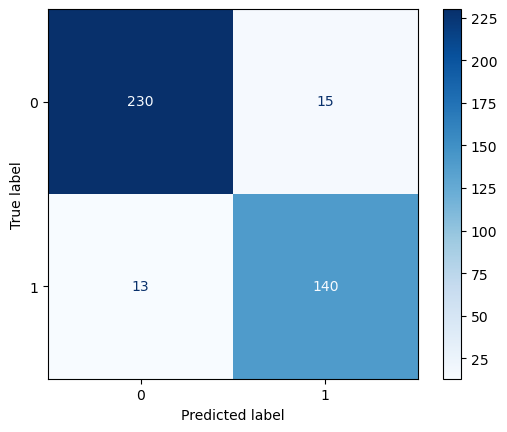

In [185]:
cross_val_confusion_matrix(pipeline_decisiontree_hyperp, X_train, y_train, 3)

### Random Forest

In [100]:
# Create a Decision tree classifier model
rf = RandomForestClassifier(random_state=42)

#  implement pipeline
pipeline_rf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", rf)]
)

In [101]:
score_rf = cross_val_score(pipeline_rf, X_train, y_train, cv=4, scoring="f1")
score_rf

array([0.96202532, 0.93150685, 0.97435897, 0.94736842])

In [102]:
# Create a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Hyperparameter Optimization
parameters = {'n_estimators': [100, 200, 500], 
              'max_features': ['log2', 'sqrt'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [5, 10, None]
             }

# Run the grid search
grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_

In [103]:
rf

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       n_estimators=500, random_state=42)

In [104]:
#  implement pipeline
pipeline_rf_hyperp = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", rf)]
)
score_rf_hyperp = cross_val_score(pipeline_rf_hyperp, X_train, y_train, cv=4, scoring="f1")
score_rf_hyperp

array([0.94871795, 0.93150685, 0.97435897, 0.97297297])

In [105]:
score = np.mean(score_rf_hyperp)

scores.append(score)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       245
           1       0.95      0.95      0.95       153

    accuracy                           0.96       398
   macro avg       0.96      0.96      0.96       398
weighted avg       0.96      0.96      0.96       398



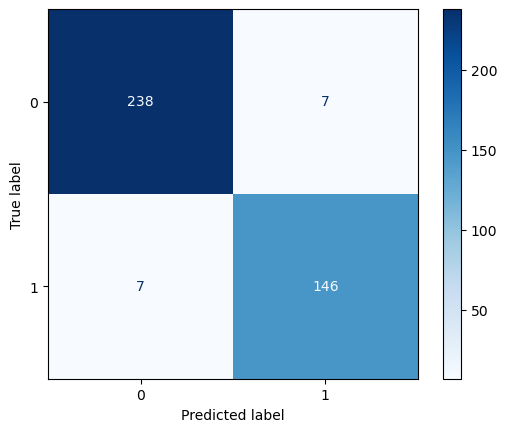

In [186]:
cross_val_confusion_matrix(pipeline_rf_hyperp, X_train, y_train, 3)

### Support Vector Machine

In [109]:
svc = svm.SVC(random_state=42)

#  implement pipeline
pipeline_svc = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", svc)]
)

In [110]:
score_svc = cross_val_score(pipeline_svc, X_train, y_train, cv=4, scoring="f1")
score_svc

array([0.97368421, 0.95890411, 0.98701299, 0.94871795])

In [111]:
# Hyperparameter Optimization
parameters = [
              
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},

  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
  
]

# Run the grid search
grid_obj = GridSearchCV(svc, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_

In [112]:
svc

SVC(C=10, kernel='linear', random_state=42)

In [113]:
#  implement pipeline
pipeline_svc_hyperp = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", svc)]
)
score_svc_hyperp = cross_val_score(pipeline_svc_hyperp, X_train, y_train, cv=4, scoring="f1")
score_svc_hyperp

array([0.94871795, 0.92957746, 0.97368421, 0.94871795])

In [114]:
score = np.mean(score_svc_hyperp)

scores.append(score)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       245
           1       0.94      0.95      0.94       153

    accuracy                           0.96       398
   macro avg       0.95      0.96      0.96       398
weighted avg       0.96      0.96      0.96       398



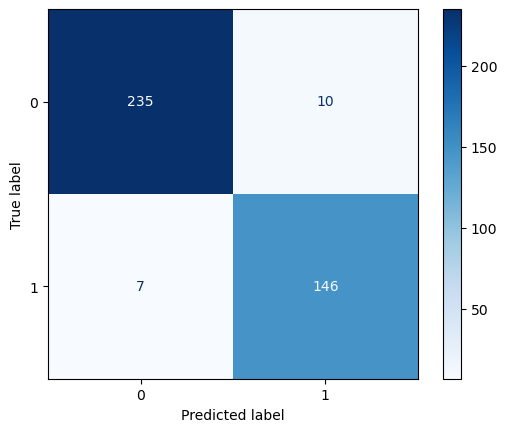

In [187]:
cross_val_confusion_matrix(pipeline_svc_hyperp, X_train, y_train, 3)

### K - Nearest Neighbors

In [116]:
knn = KNeighborsClassifier()

#  implement pipeline
pipeline_knn = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", knn)]
)

In [117]:
score_knn = cross_val_score(pipeline_knn, X_train, y_train, cv=4, scoring="f1")
score_knn

array([0.96      , 0.94444444, 0.96103896, 0.93150685])

In [118]:
# Hyperparameter Optimization
parameters = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

# Run the grid search
grid_obj = GridSearchCV(knn, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_

In [119]:
knn

KNeighborsClassifier(leaf_size=10)

In [120]:
#  implement pipeline
pipeline_knn_hyperp = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", knn)]
)
score_knn_hyperp = cross_val_score(pipeline_knn_hyperp, X_train, y_train, cv=4, scoring="f1")
score_knn_hyperp

array([0.96      , 0.94444444, 0.96103896, 0.93150685])

In [121]:
score = np.mean(score_knn_hyperp)

scores.append(score)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       245
           1       0.99      0.93      0.96       153

    accuracy                           0.97       398
   macro avg       0.97      0.96      0.97       398
weighted avg       0.97      0.97      0.97       398



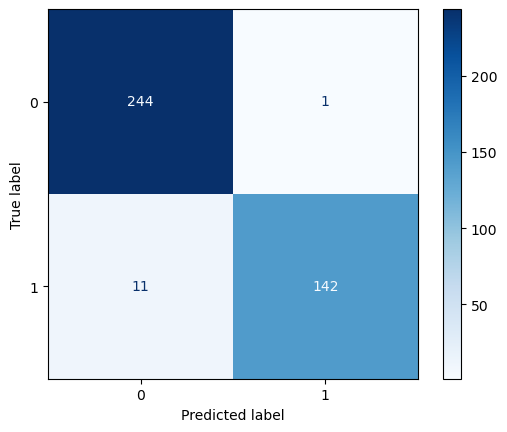

In [188]:
cross_val_confusion_matrix(pipeline_knn_hyperp, X_train, y_train, 3)

### XGBoost

In [207]:
xgb = XGBClassifier(random_state=42,verbosity=0, use_label_encoder=False)

#  implement pipeline
pipeline_xgb = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", xgb)]
)

In [208]:
import warnings
warnings.filterwarnings("ignore")

score_xgb = cross_val_score(pipeline_xgb, X_train, y_train, cv=4, scoring="f1")

warnings.simplefilter('always')

score_xgb

array([0.97435897, 0.96      , 0.98701299, 0.98666667])

**Using Hyperparameter tuning GridSearchCV() I couldn't find a better one**

In [209]:
score = np.mean(score_xgb)

scores.append(score)

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


              precision    recall  f1-score   support

           0       0.97      0.98      0.97       245
           1       0.97      0.95      0.96       153

    accuracy                           0.97       398
   macro avg       0.97      0.96      0.97       398
weighted avg       0.97      0.97      0.97       398



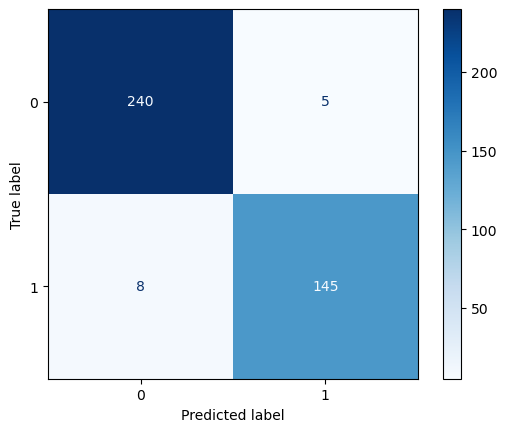

In [210]:
cross_val_confusion_matrix(pipeline_xgb, X_train, y_train, 3)

### Evaluation and comparision of all the models

In [213]:
scores

[0.9563348993482427,
 0.926175969859861,
 0.9568891863412412,
 0.9501743931877364,
 0.9492475636996185,
 0.9770096570096569,
 0.9770096570096569]

In [214]:
scores.pop(-1)

0.9770096570096569

In [215]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors', 'XGBoost'],
    'Score': scores})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,XGBoost,0.977010
2,Random Forest,0.956889
0,Logistic Regression,0.956335
3,Support Vector Machines,0.950174
4,K - Nearest Neighbors,0.949248
1,Decision Tree,0.926176


Now that we know which is the best model, we're oing to predict wih it and then interpret the results

In [216]:
pipeline_xgb = pipeline_xgb.fit(X_train, y_train)

pred_xgb = pipeline_xgb.predict(X_test)

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


              precision    recall  f1-score   support

           0       0.92      0.98      0.95       112
           1       0.96      0.85      0.90        59

    accuracy                           0.94       171
   macro avg       0.94      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



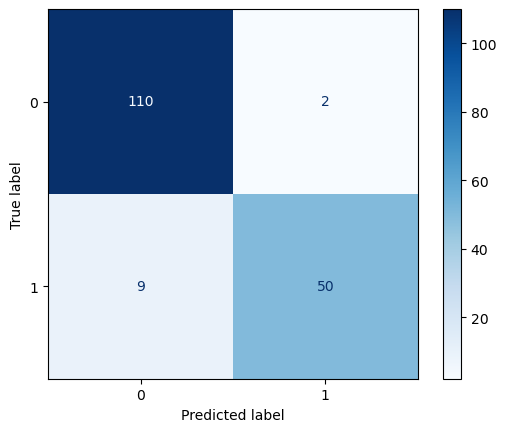

In [225]:
cross_val_confusion_matrix(pipeline_xgb, X_test, y_test, 3)

## Interpreting XGBoost Classifier Model

### Create SHAP Explainer & Compute SHAP values

In [229]:
import warnings
warnings.filterwarnings("ignore")

explainer = shap.TreeExplainer(pipeline_xgb.named_steps['classifier'])
shap_values = explainer.shap_values(X_test)

warnings.simplefilter('always')

### View SHAP values

In [230]:
X_test.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
356,13.05,18.59,85.09,512.0,0.1082,0.13040,0.096030,0.05603,0.2035,0.06501,...,14.19,24.85,94.22,591.2,0.1343,0.2658,0.25730,0.12580,0.3113,0.08317
556,10.16,19.59,64.73,311.7,0.1003,0.07504,0.005025,0.01116,0.1791,0.06331,...,10.65,22.88,67.88,347.3,0.1265,0.1200,0.01005,0.02232,0.2262,0.06742
283,16.24,18.77,108.80,805.1,0.1066,0.18020,0.194800,0.09052,0.1876,0.06684,...,18.55,25.09,126.90,1031.0,0.1365,0.4706,0.50260,0.17320,0.2770,0.10630


In [231]:
pd.DataFrame(shap_values, columns=X_test.columns).head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.016736,1.155308,0.0,0.152055,0.039282,-0.117284,-0.007664,1.567056,0.009347,-0.317972,...,1.116287,0.928019,1.335262,1.618003,-0.338478,-0.043488,0.547351,0.031051,0.391625,-0.002568
1,-0.016736,1.120851,0.0,0.204903,0.039282,-0.117284,-0.007664,1.567056,0.009347,-0.317972,...,1.116287,0.928019,1.335262,1.618003,-0.587233,-0.043488,0.518203,-0.185766,0.391625,-0.002568
2,-0.016736,1.093764,0.0,0.152055,0.039282,-0.117284,0.002569,1.565255,0.009347,-0.317972,...,1.116287,0.905455,1.312640,1.618669,-0.338478,0.059135,0.547351,0.026059,0.391625,-0.002568


### Global Interpretation - Feature Importance Globally

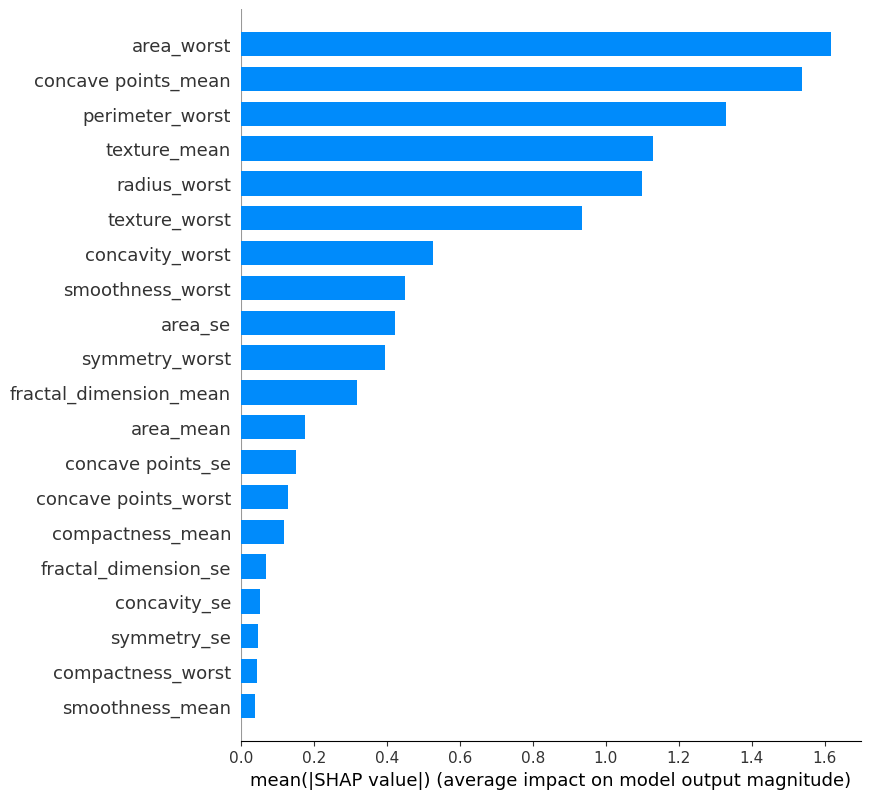

In [232]:
shap.summary_plot(shap_values, X_test, plot_type='bar', show=None)
plt.savefig('images/global_interpretations.jpg', bbox_inches="tight")

### Local Interpretations

In [233]:
explainer.expected_value

-0.9775443

In [234]:
y_test.iloc[10], pred_xgb[10]

(0, 0)

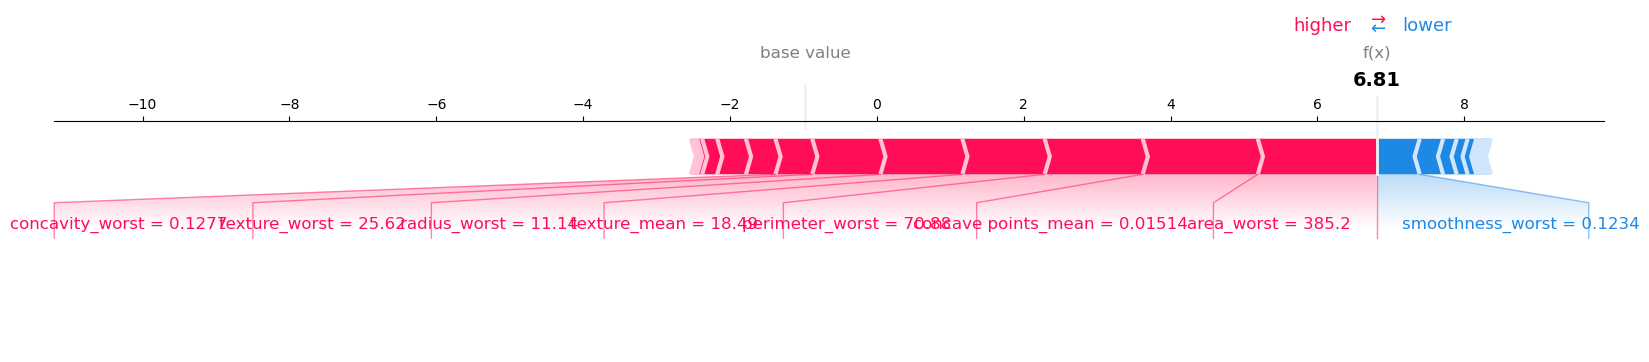

In [253]:
warnings.filterwarnings("ignore")

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[10,:], 
                X_test.iloc[10, :], show=None, matplotlib=True).savefig('images/local_interpretations.jpg', bbox_inches="tight")

In [237]:
y_test.iloc[1], pred_xgb[1]

(0, 0)

In [248]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1, :], X_test.iloc[1, :])


Local Interpretations### Partial Dependence Plots

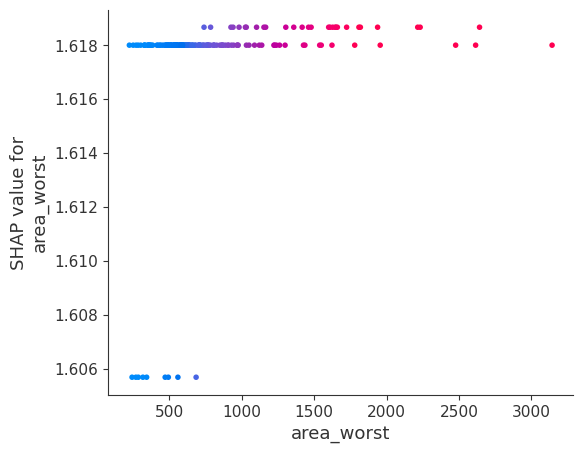

In [257]:
shap.dependence_plot(ind='area_worst', interaction_index='area_worst',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test, show=None)
plt.savefig('images/partial_dependence.jpg', bbox_inches="tight")

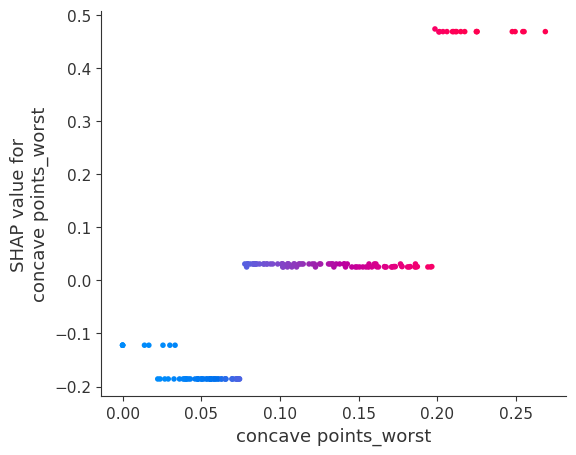

In [258]:
shap.dependence_plot(ind='concave points_worst', interaction_index='concave points_worst',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

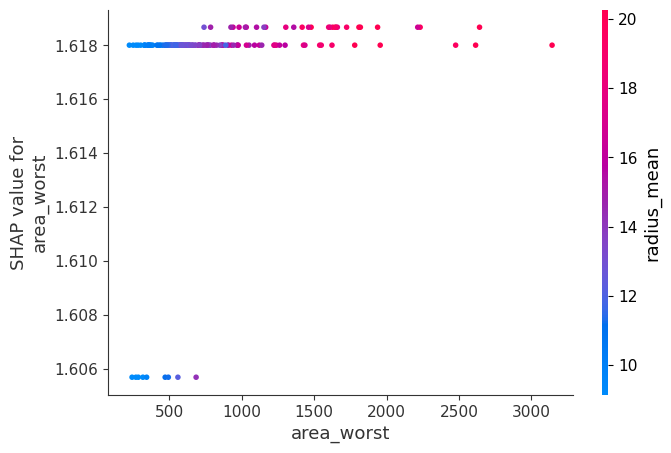

In [261]:
shap.dependence_plot(ind='area_worst', interaction_index='radius_mean',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)